In [128]:
using Plots

In [129]:
data_points =[(−1.0,0.0385),(−0.5,0.1379),(0.0,1.0),(0.5,0.1379),(1.0,0.0385)]
# data_points = [(0,1),(1,3),(2,4),(3,7)]

5-element Vector{Tuple{Float64, Float64}}:
 (-1.0, 0.0385)
 (-0.5, 0.1379)
 (0.0, 1.0)
 (0.5, 0.1379)
 (1.0, 0.0385)

In [130]:
x_points = [x for (x,y) in data_points]
y_points = [y for (x,y) in data_points]

5-element Vector{Float64}:
 0.0385
 0.1379
 1.0
 0.1379
 0.0385

In [131]:
function evaluate_h(x)
    h_i = []
    for i in 1:length(x)-1
        h = x[i+1]-x[i]
        push!(h_i, h)
    end
    return h_i
end

evaluate_h (generic function with 1 method)

In [132]:
h_i = evaluate_h(x_points)

4-element Vector{Any}:
 0.5
 0.5
 0.5
 0.5

In [133]:
function evaluate_slope(data_points)
    m = []
    for i in 1:length(data_points)-1
        slope = (data_points[i+1][2]-data_points[i][2])/(data_points[i+1][1]-data_points[i][1])
        push!(m, slope)
    end
    return m
end

evaluate_slope (generic function with 1 method)

In [134]:
slopes = evaluate_slope(data_points)

4-element Vector{Any}:
  0.19879999999999998
  1.7242
 -1.7242
 -0.19879999999999998

In [135]:
u_i = [2*(h_i[i-1]+h_i[i]) for i in 2:length(h_i)]
v_i = [6*(slopes[i]-slopes[i-1]) for i in 2:length(slopes)] # v_i= i belongs to 1,2,3,4

3-element Vector{Float64}:
   9.1524
 -20.6904
   9.1524

In [136]:
u_i

3-element Vector{Float64}:
 2.0
 2.0
 2.0

In [137]:
no_of_unknows = length(data_points)-2

3

In [138]:
A = zeros(no_of_unknows, no_of_unknows)
b = v_i

3-element Vector{Float64}:
   9.1524
 -20.6904
   9.1524

In [139]:
# fill the A matrix with tri-diagonal values of the natural cubic spliney
for i in 1:no_of_unknows
    A[i, i] = u_i[i]  # Main diagonal
    if i > 1
        A[i, i-1] = h_i[i]  # Lower diagonal
    end
    if i < no_of_unknows
        A[i, i+1] = h_i[i]  # Upper diagonal
    end
end

In [140]:
A

3×3 Matrix{Float64}:
 2.0  0.5  0.0
 0.5  2.0  0.5
 0.0  0.5  2.0

In [141]:
M_i = A\b 
M_i = [0; M_i; 0]

5-element Vector{Float64}:
   0.0
   8.185714285714287
 -14.438057142857144
   8.185714285714287
   0.0

In [142]:
function s(x)
    for i in 1:length(data_points)-1
        if x >= data_points[i][1] && x <= data_points[i+1][1]
            s = M_i[i]*((data_points[i+1][1]-x)^3)/(6*h_i[i]) + M_i[i+1]*((x-data_points[i][1])^3)/(6*h_i[i]) + (data_points[i][2]-M_i[i]*h_i[i]^2/6)*(data_points[i+1][1]-x)/h_i[i] + (data_points[i+1][2]-M_i[i+1]*h_i[i]^2/6)*(x-data_points[i][1])/h_i[i]
            return s
        end
    end

end

s (generic function with 2 methods)

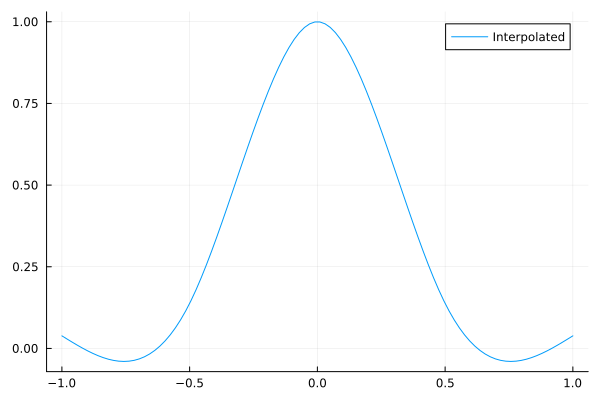

In [144]:
x_range = range(x_points[1],x_points[end], length=100)
y_interpolated = [s(x) for x in x_range]

plot(x_range, y_interpolated, label="Interpolated")